# Analisa Kesehatan Mental Mahasiswa dan Faktor-Faktor yang Mempengaruhi

# Nama : Fahri Armand Rasyad
# Batch : RMT-035

### Fahri merupakan bidang kemahasiswaan dari suatu kampus di malang yang bertugas untuk mencari tahu apa yang mempengaruhi kesehatan mental pada mahasiswa dan mahasiswa lalu memberikan solusi yang sesuai berdasarkan kesimpulan dari analisa data

## Identifikasi Masalah

## SMART
### Specific: Mengetahui faktor apa yang mempengaruhi kesehatan mental
### Measurable : Jumlah mahasiswa, tingkat depresi, tingkat isolasi, tingkat kecemasan, tingkat diskriminasi, tingkat beban akademik, durasi tidur dan aktivitas olahraga
### Achievable : Dengan data yang sudah didapatkan, kita dapat mengetahui faktor apa yang benar-benar mempengaruhi kesehatan mental, dan dengan itu dapat mulai untuk mencari solusi yang tepat
### Relevant : Faktor yang mempengaruhi kesehatan mental dan nilai akademik
### Time-Bound: Mencari solusi dalam kurun waktu 1 bulan setelah masalah ditemukan

## Problem Statement: Mengetahui faktor-faktor umum yang mempengaruhi kesehatan mental mahasiswa dan pencapaian akademik mereka

## Analytic Metrics 
### menggunakan client load untuk melihat tingkat stress mahasiswa dan apa yang mempengaruhi
### dari link berikut https://therapybrands.com/blog/6-business-metrics-therapists-must-track/

## Penjabaran Masalah
### 1. Bagaimana distribusi kondisi kesehatan mental seperti depresi berdasarkan gender?(visualization)
### 2. Bagaimana hubungan antara tahun kuliah (academic_year) dengan beban akademik (academic_workload)?(visualization)
### 3. Apakah ada hubungan antara durasi tidur rata-rata (average_sleep) dan rata-rata nilai akademik (average_gpa)?(visualization)
### 4. Bagaimana Finansial (financial_concerns) mempengaruhi rata-rata nilai akademik (average_gpa)?(visualization)
### 5. Apakah  jurusan mempengaruhi tingkat insekuritas masa depan?(Descriptive)
### 6. Adakah korelasi antara umur dengan tingkat insekuritas masa depan?(Descriptive)
### 7. Apakah aktivitas olahraga (sports_engagement) secara signifikan mempengaruhi tingkat depresi mahasiswa?(inferential)
### 8. Apakah tingkat hubungan sosial berhubungan dengan tingkat depresi?(visualization)
### 9. Aktivitas Stress Relieve apa yang paling banyak dilakukan oleh mahasiswa dan mahasiswi(Descriptive)
### 10. Apakah Status tempat tinggal mempengaruhi nilai akademik?(visualization)

## Link Tableau : https://public.tableau.com/app/profile/fahri.rasyad/viz/AnalisaKesehatanMentalMahasiswadanFaktor-FaktoryangMempengaruhiFahriArmandRasyad/AnalysisofStudentMentalHealthandInfluencingFactors?publish=yes

## Data Loading
### Data bersumber di https://www.kaggle.com/datasets/abdullahashfaqvirk/student-mental-health-survey

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load data dari CSV
df = pd.read_csv('MentalHealthSurvey.csv')

# Tampilkan struktur dan beberapa contoh data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         87 non-null     int64 
 14  financial_concerns        87

#### terdapat 21 kolom di dataframe

In [3]:
df.head()


,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


### Rangkuman Data

In [4]:
# Untuk Melihat rangkuman data
df.describe()

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,19.942529,3.931034,3.885057,3.781609,3.390805,2.781609,3.218391,3.218391,3.241379,3.011494
std,1.623636,1.043174,0.854880,1.125035,1.400634,1.175578,1.367609,1.297809,1.405682,1.385089
min,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,3.000000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,20.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,21.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,4.000000,4.500000,4.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Melihat semua column pada data

In [5]:
# untuk melihat column apa saja dalam data
print(df.columns)

Index(['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'cgpa', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep', 'study_satisfaction',
       'academic_workload ', 'academic_pressure', 'financial_concerns',
       'social_relationships', 'depression', 'anxiety', 'isolation',
       'future_insecurity', 'stress_relief_activities'],
      dtype='object')


### Melihat bentuk dari data pada tiap column

In [6]:
# untuk melihat bentuk data di column 
print(df.dtypes)

gender                      object
age                          int64
university                  object
degree_level                object
degree_major                object
academic_year               object
cgpa                        object
residential_status          object
campus_discrimination       object
sports_engagement           object
average_sleep               object
study_satisfaction           int64
academic_workload            int64
academic_pressure            int64
financial_concerns           int64
social_relationships         int64
depression                   int64
anxiety                      int64
isolation                    int64
future_insecurity            int64
stress_relief_activities    object
dtype: object


### melihat data dalam bentuk tabel untuk 5 data pertama

In [7]:
# tampilan data dalam tabel
df.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


## Data Cleaning

###  merubah column cgpa agar dapat bisa dihitung

In [8]:
print(df['cgpa'].unique())


['3.0-3.5' '2.5-3.0' '3.5-4.0' '1.5-2.0' '2.0-2.5' '0.0-0.0']


In [9]:
# membuat value untuk kolom baru average_gpa
def assign_broader_category(cgpa): 
    A_Students = ['3.5-4.0']
    B_Students = ['3.0-3.5']
    C_Students = ['2.5-3.0']
    D_Students = ['2.0-2.5']
    E_Students = ['1.5-2.0']
    F_Students = ['0.0-0.0']
    if cgpa in A_Students:
        return "3.75"
    elif cgpa in B_Students:
        return "3.25"
    elif cgpa in C_Students:
        return "2.75"
    elif cgpa in D_Students:
        return "2.25"
    elif cgpa in E_Students:
        return "1.75"
    else:
        return "0"

In [10]:
# memasukkan kolom average_gpa ke dataframe
df['average_gpa'] = df['cgpa'].apply(assign_broader_category)

In [11]:
# merubah data pada average gpa menjadi float
df['average_gpa'] = df['average_gpa'].astype(float)

In [12]:
# berikut bentuk tipe data average gpa setelah diubah
df.average_gpa.dtypes

dtype('float64')

In [13]:
# berikut merupakan column average gpa setelah ditambahkan ke dataframe
df[['average_gpa']]

,average_gpa
0,3.25
1,3.25
2,2.75
3,2.75
4,3.25
...,...
82,3.25
83,3.75
84,2.25
85,2.75


#### average_gpa sudah berubah menjadi float agar bisa dihitung

In [14]:
print(df['average_sleep'].unique())


['4-6 hrs' '2-4 hrs' '7-8 hrs']


### merubah value average_sleep agar lebih sesuai

### ubah kategorisasi menjadi lebih sesuai

In [15]:
# value sebelum dan sesudah
replacement_dict = {
    '4-6 hrs': '5',
    '2-4 hrs': '3',
    '7-8 hrs': '7.5'
}

# merubah value di avarage sleep agar dapat dihitung
df['average_sleep'] = df['average_sleep'].replace(replacement_dict)

# merubah tipe column menjadi float
df['average_sleep'] = df['average_sleep'].astype(float)

In [16]:
print(df['average_sleep'].unique())


[5.  3.  7.5]


### rename column agar lebih sesuai

In [17]:
df.rename(columns={'average_sleep': 'average_sleep_hours'}, inplace=True)


### Menghapus kolom cgpa karena sudah ada kolom average gpa

In [18]:
# menghapus kolom cgpa
df.drop(columns=['cgpa'], inplace=True)

In [19]:
print(df.columns)

Index(['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep_hours', 'study_satisfaction',
       'academic_workload ', 'academic_pressure', 'financial_concerns',
       'social_relationships', 'depression', 'anxiety', 'isolation',
       'future_insecurity', 'stress_relief_activities', 'average_gpa'],
      dtype='object')


In [20]:
# Untuk Menghilangkan whitespace dalam kolom
df.columns = df.columns.str.strip()


In [21]:
print(df.columns)

Index(['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep_hours', 'study_satisfaction',
       'academic_workload', 'academic_pressure', 'financial_concerns',
       'social_relationships', 'depression', 'anxiety', 'isolation',
       'future_insecurity', 'stress_relief_activities', 'average_gpa'],
      dtype='object')


In [22]:
# untuk mengetahui apakah ada missing value
print(df.isna().sum())

gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep_hours         0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
isolation                   0
future_insecurity           0
stress_relief_activities    0
average_gpa                 0
dtype: int64


### mengetahui value apa saja yang di sports_engagement

In [23]:
print(df['sports_engagement'].unique())

['No Sports' '1-3 times' '7+ times' '4-6 times']


### merubah value di sports_engagement agar lebih mudah diolah

In [24]:
# value sebelum dan sesudah
replacement_dict = {
    'No Sports': 'None',
    '1-3 times': 'Low',
    '4-6 times': 'Medium',
    '7+ times': 'High'
}

# merubah value sports_engagement
df['sports_engagement'] = df['sports_engagement'].replace(replacement_dict)

### data yang sudah diubah

In [25]:
print(df['sports_engagement'].unique())

['None' 'Low' 'High' 'Medium']


In [26]:
# Overwrite the CSV file
df.to_csv('MentalHealthSurvey(clean).csv', index=False)

print("file baru disimpan.")

file baru disimpan.


## Analisa dan Perhitungan

In [27]:
df_2 = pd.read_csv('MentalHealthSurvey(clean).csv')

### Problem 1. Bagaimana distribusi kondisi kesehatan mental seperti depresi berdasarkan gender?

In [28]:
gender_counts = df_2['gender'].value_counts()

# menunjukkan total mahasiswa dan mahasiswi
print(gender_counts)

gender
Male      63
Female    24
Name: count, dtype: int64


In [29]:
# Menghitung banyaknya mahasiswa dan membandingkan dari tingkat depresi dan gender
distribusi_depresi = df_2.groupby(['gender', 'depression']).size().reset_index(name='count')

# menunjukkan data di grup
print(distribusi_depresi)

   gender  depression  count
0  Female           1      4
1  Female           2      1
2  Female           3      3
3  Female           4      9
4  Female           5      7
5    Male           1      9
6    Male           2     13
7    Male           3     18
8    Male           4     10
9    Male           5     13


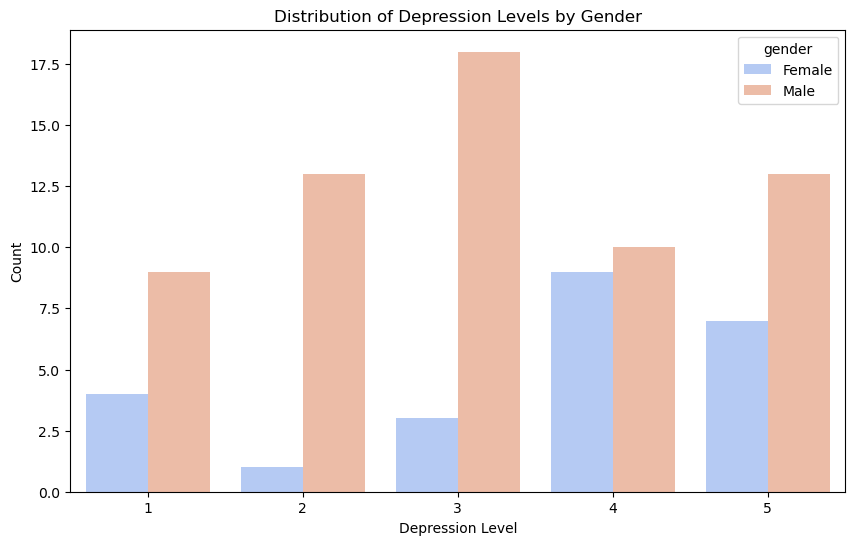

In [30]:
# untuk visualisasi data terkait perbandingan tingkat depresi berdasarkan gender 
plt.figure(figsize=(10, 6))
sns.barplot(data=distribusi_depresi, x='depression', y='count', hue='gender', palette='coolwarm')
plt.title('Distribution of Depression Levels by Gender')
plt.xlabel('Depression Level')
plt.ylabel('Count')
plt.show()

#### dari data tersebut, mahasiswa paling banyak berada di tingkat depresi 3 sedangkan untuk mahasiswi di tingkat depresi 4

### Problem 2. Bagaimana hubungan antara tahun kuliah (academic_year) dengan beban akademik (academic_workload)

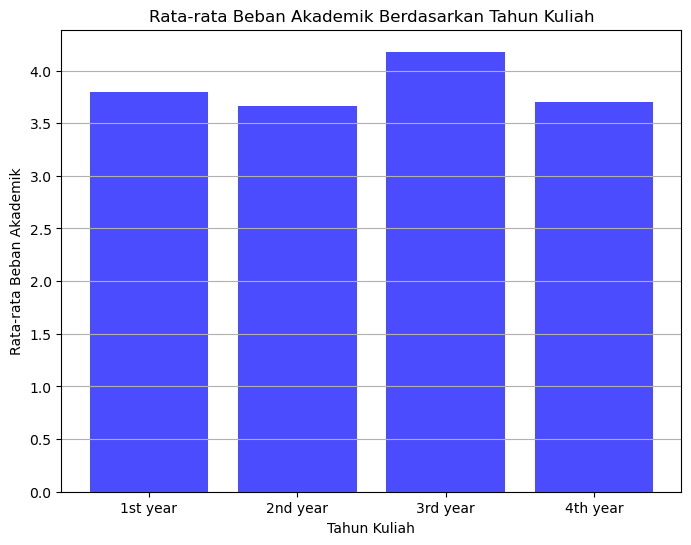

In [31]:
# Menghitung rata-rata beban akademik untuk setiap tahun kuliah
average_workload = df_2.groupby('academic_year')['academic_workload'].mean()

# Membuat plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(average_workload.index, average_workload.values, color='b', alpha=0.7)

# Menambahkan judul dan label
plt.title('Rata-rata Beban Akademik Berdasarkan Tahun Kuliah')
plt.xlabel('Tahun Kuliah')
plt.ylabel('Rata-rata Beban Akademik')
plt.grid(axis='y')  # Menambahkan grid horizontal untuk mempermudah pembacaan

# Menampilkan plot
plt.show()


#### dari data tersebut didapatkan bahwa tidak adanya hubungan antara banyak atau sedikitnya beban akademik terhadap tahun kuliah mahasiswa/mahasiswi

### Problem 3. Apakah ada hubungan antara rata-rata jam tidur dengan rata-rata nilai akademik 

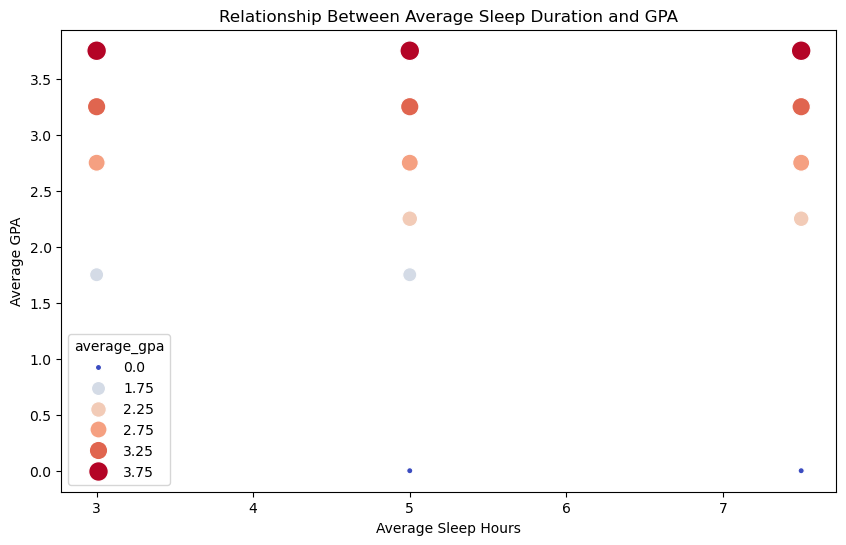

In [32]:
# Scatter plot untuk menunjukkan hubungan antara rata-rata jam tidur dan rata-rata ipk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_2, x='average_sleep_hours', y='average_gpa', hue='average_gpa', palette='coolwarm', size='average_gpa', sizes=(20, 200))
plt.title('Relationship Between Average Sleep Duration and GPA')
plt.xlabel('Average Sleep Hours')
plt.ylabel('Average GPA')
plt.show()

#### didapatkan dari data bahwa tidak ada hubungan signfikan dari jam tidur dengan nilai ipk yang berarti durasi jam tidur tidak terlalu mempengaruhi nilai

### Problem 4. Bagaimana masalah keuangan mempengaruhi nilai akademik

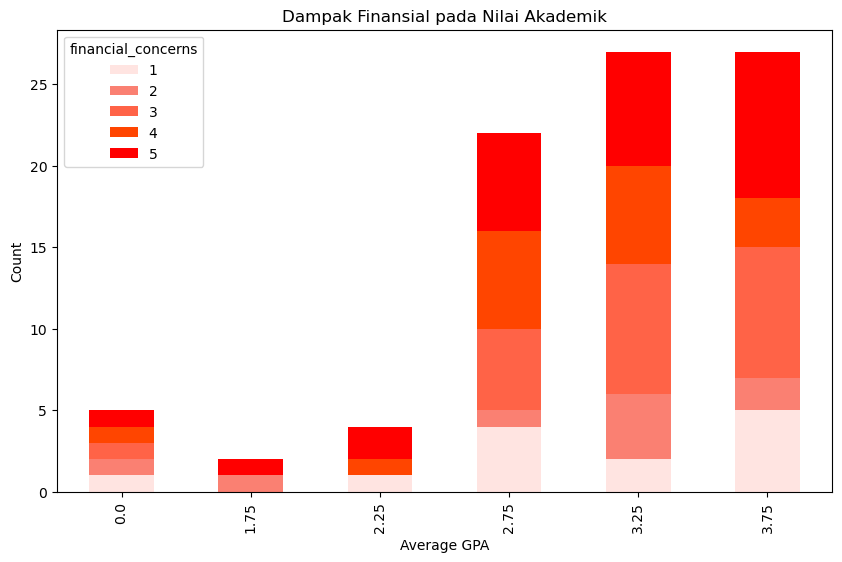

In [33]:
# Stacked bar chart untuk hubungan antara masalah keuangan dengan nilai ipk
financial_gpa = pd.crosstab(df_2['average_gpa'], df_2['financial_concerns'])
financial_gpa.plot(kind='bar', stacked=True, color=['mistyrose', 'salmon', 'tomato','orangered', 'red'  ], figsize=(10, 6))
plt.title('Dampak Finansial pada Nilai Akademik')
plt.xlabel('Average GPA')
plt.ylabel('Count')
plt.show()


#### dari data diatas, didapatkan bahwa mahasiswa/mahasiswi dengann masalah finansial lebih termotivasi untuk belajar dan nilai tinggi karena masalah finansial tingkat 4 dan 5 paling banyak di ipk rata-rata 3.75

#### Jurnal Pendukung: https://seminar.uad.ac.id/index.php/PSNBK/article/view/13612

### Problem 5. Apakah  jurusan mempengaruhi tingkat insekuritas masa depan??

In [34]:
# Statistik deskriptif untuk insekuritas masa depan berdasarkan jurusan
stats_by_jurusan = df_2.groupby('degree_major')[['future_insecurity']].describe()

stats_by_jurusan


future_insecurity                                     \
                                   count      mean       std  min  25%  50%   
degree_major                                                                  
Computer Science                    34.0  3.411765  1.233808  1.0  3.0  3.0   
Data Science                        41.0  2.707317  1.382821  1.0  2.0  3.0   
Information Technology               9.0  2.666667  1.414214  1.0  2.0  2.0   
Software Engineering                 3.0  3.666667  2.309401  1.0  3.0  5.0   

                                  
                        75%  max  
degree_major                      
Computer Science        4.0  5.0  
Data Science            4.0  5.0  
Information Technology  4.0  5.0  
Software Engineering    5.0  5.0

#### Dari data, didapatkan bahwa rata-rata tingkat insekuritas tertinggi ada pada mahasiswa/mahasiswi yang berada pada di jurusan software engineering dan terendah ada pada jurusan information technology

### Problem 6. Adakah korelasi antara umur dengan tingkat insekuritas masa depan?

In [35]:
# Correlation Analysis untuk melihat adakah korelasi antara umur dengan insekuritas masa depan
# (H0): tidak adanya korelasi antara umur dan insekuritas mada depan
# (H1): adanya korelasi antara umur dan insekuritas mada depan
correlation, p_value = stats.spearmanr(df_2['age'], df_2['future_insecurity'])
print(f"Spearman Correlation: {correlation}, p-value = {p_value}")

# jika p-value < 0.05, maka ada korelasi antara umur dan insekuritas mada depan

Spearman Correlation: 0.10526078645822469, p-value = 0.3318941983097501


#### dari data, didapatkan bahwa tidak adanya korelasi antara umur dan insekuritas masa depan yang berarti merasa insecure terhadap masa depan tidak dipengaruhi dengan umur, bisa saja di umur 19 tahun memiliki insekuritas masa depan yang tinggi atau sebaliknya

### Problem 7. Apakah aktivitas olahraga (sports_engagement) secara signifikan mempengaruhi tingkat depresi mahasiswa?

In [36]:

# Klasifikasi baru untuk tingkat depresi
df_2['depression_category'] = df_2['depression'].apply(lambda x: 'Low to Medium' if x <= 3 else 'High to Severe')

# Klasifikasi baru untuk value di aktivitas olahraga
df_2['sports_engagement_category'] = df_2['sports_engagement'].apply(lambda x: 'Low to None' if x in ['No Sports', 'Low'] else 'Moderate to High')

# mengubah kategori depresi menjadi numeric simple
df_2['depression_numeric'] = df_2['depression_category'].map({'Low to Medium': 0, 'High to Severe': 1})

# membagi group berdasarkan kategori aktivitas olahraga
low_none = df_2[df_2['sports_engagement_category'] == 'Low to None']['depression_numeric']
moderate_high = df_2[df_2['sports_engagement_category'] == 'Moderate to High']['depression_numeric']

# t-test
t_stat, p_value = stats.ttest_ind(low_none, moderate_high, equal_var=False)

# hasil t-test
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Ada Perbedaan tingkat depresi yang signifikan antara mahasiswa/mahasiswi dengan aktifitas olahraga low to none dan moderate to high sports.")
else:
    print("Tidak adanya Perbedaan tingkat depresi yang signifikan antara mahasiswa/mahasiswi dengan aktifitas olahraga low to none dan moderate to high sports.")



T-statistic: -1.8958, P-value: 0.0644
Tidak adanya Perbedaan tingkat depresi yang signifikan antara mahasiswa/mahasiswi dengan aktifitas olahraga low to none dan moderate to high sports.


#### dikarenakan P-Value > 0.05, maka Tidak adanya Perbedaan tingkat depresi yang signifikan antara mahasiswa/mahasiswi dengan aktifitas olahraga low to none dan moderate to high sports. yang berarti olahraga tidak terlalu signifikan dalam membantu tinggi rendah nya depresi


### Problem 8. Apakah tingkat hubungan sosial berhubungan dengan tingkat depresi?


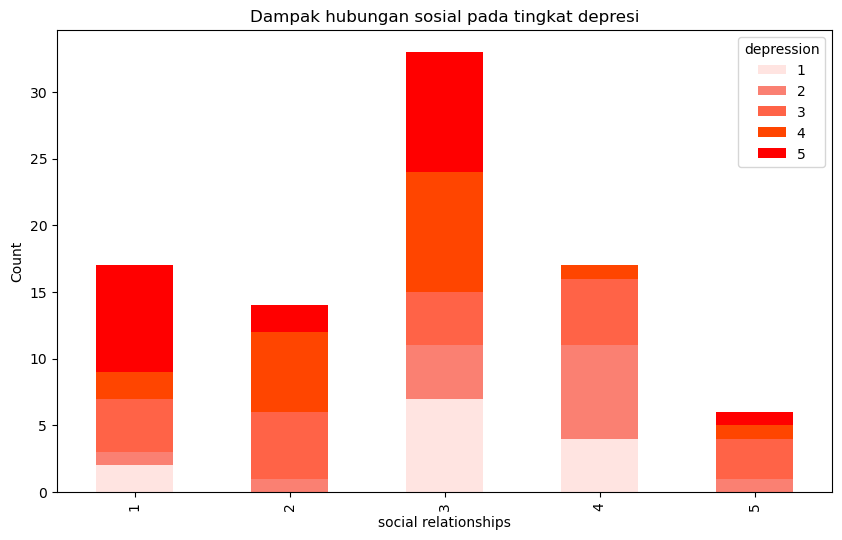

In [37]:
# Stacked bar chart untuk hubungan antara masalah keuangan dengan nilai ipk
financial_gpa = pd.crosstab(df_2['social_relationships'], df_2['depression'])
financial_gpa.plot(kind='bar', stacked=True, color=['mistyrose', 'salmon', 'tomato','orangered', 'red'  ], figsize=(10, 6))
plt.title('Dampak hubungan sosial pada tingkat depresi')
plt.xlabel('social relationships')
plt.ylabel('Count')
plt.show()

#### dari data, didapatkan bahwa hubungan sosial berdampak pada tingkat depresi dengan mahasiswa/mahasiswi dengan tingkat hubungan sosial 5 memiliki tingkat depresi paling sedikit

### Problem 9. Aktivitas Stress Relieve apa yang paling banyak dilakukan oleh mahasiswa dan mahasiswi

In [38]:
# memisah aktivitas multi yang nyambung dengan satu sama lain menjadi unik
activities_split = df_2['stress_relief_activities'].str.split(', ', expand=True).stack()

# menghitung frekuensi setiap aktifitas
activity_counts = activities_split.value_counts().reset_index()
activity_counts.columns = ['stress_relief_activities', 'Count']

# menyortir dari banyak ke sedikit
activity_counts = activity_counts.sort_values(by='Count', ascending=False)

# menunjukkan aktivitas
print(activity_counts)

  stress_relief_activities  Count
0     Religious Activities     46
1     Online Entertainment     37
2       Social Connections     33
3       Sports and Fitness     20
4                    Sleep     20
5       Outdoor Activities     19
6         Creative Outlets     10
7                  Nothing      1


#### didapatkan dari data bahwa aktivitas melepas stress yang paling digemari adalah aktivitas religius 

### Problem 10. Apakah Status tempat tinggal mempengaruhi nilai akademik?

C:\Users\C O R E I 5\AppData\Local\Temp\ipykernel_20532\1728262021.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='residential_status', y='average_gpa', data=df_2, palette='Set3')


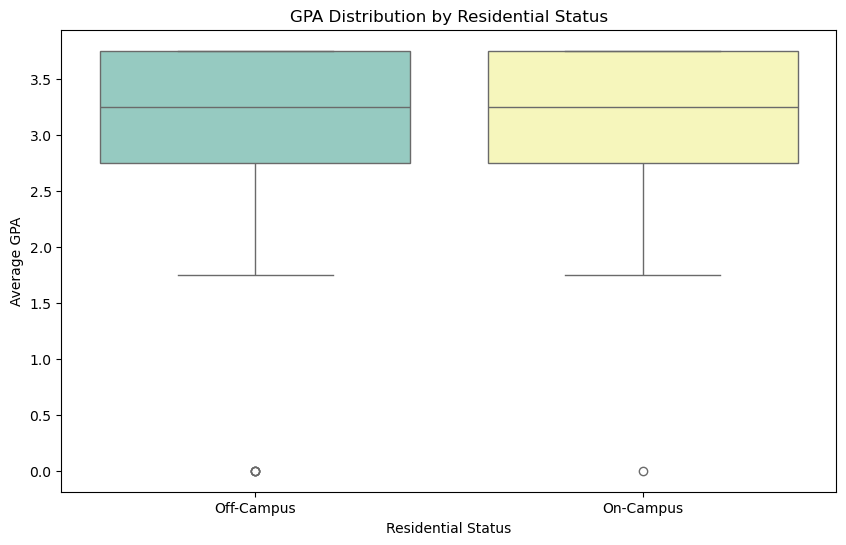

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='residential_status', y='average_gpa', data=df_2, palette='Set3')
plt.title('GPA Distribution by Residential Status')
plt.xlabel('Residential Status')
plt.ylabel('Average GPA')
plt.show()

#### didapatkan dari data bahwa status tempat tinggal tidak berpengaruh dengan nilai akademik

## Pengambilan Kesimpulan

### Rekap
#### - dari data tersebut, mahasiswa paling banyak berada di tingkat depresi 3 sedangkan untuk mahasiswi di tingkat depresi 4.  

#### - dari data tersebut didapatkan bahwa tidak adanya hubungan antara banyak atau sedikitnya beban akademik terhadap tahun kuliah mahasiswa/mahasiswi. 

#### - didapatkan dari data bahwa tidak ada hubungan signfikan dari jam tidur dengan nilai ipk yang berarti durasi jam tidur tidak terlalu mempengaruhi nilai. 

#### - dari data diatas, didapatkan bahwa mahasiswa/mahasiswi dengann masalah finansial lebih termotivasi untuk belajar dan nilai tinggi karena masalah finansial tingkat 4 dan 5 paling banyak di ipk rata-rata 3.75. 

#### - Dari data, didapatkan bahwa rata-rata tingkat insekuritas tertinggi ada pada mahasiswa/mahasiswi yang berada pada di jurusan software engineering dan terendah ada pada jurusan information technology. 

#### - dari data, didapatkan bahwa tidak adanya korelasi antara umur dan insekuritas masa depan yang berarti merasa insecure terhadap masa depan tidak dipengaruhi dengan umur, bisa saja di umur 19 tahun memiliki insekuritas masa depan yang tinggi atau sebaliknya. 

#### - dikarenakan P-Value > 0.05, maka Tidak adanya Perbedaan tingkat depresi yang signifikan antara mahasiswa/mahasiswi dengan aktifitas olahraga low to none dan moderate to high sports. yang berarti olahraga tidak terlalu signifikan dalam membantu tinggi rendah nya depresi

#### - dari data, didapatkan bahwa hubungan sosial berdampak pada tingkat depresi dengan mahasiswa/mahasiswi dengan tingkat hubungan sosial 5 memiliki tingkat depresi paling sedikit.

#### - didapatkan dari data bahwa aktivitas melepas stress yang paling digemari adalah aktivitas religius . 

#### - didapatkan dari data bahwa status tempat tinggal tidak berpengaruh dengan nilai akademik

### Insight

#### - Beban akademik yang dirasakan tidak dipengaruhi dari seberapa lama mereka kuliah

#### - Durasi tidur tidak mempengaruhi nilai ipk 

#### - Tekanan finansial dapat berfungsi sebagai motivasi untuk meningkatkan prestasi akademik

#### - Olahraga tidak terlalu signifikan dalam membantu mengurangi depresi, yang berarti solusi untuk mengurangi depresi beragam pada setiap mahasiswa/mahasiswi

#### - Dukungan sosial penting untuk kesehatan mental, solusi bisa berupa acara sosial yang diadakan di kampus

#### - Agama berperan penting pada kesehatan mental, solusi bisa berupa acara agamis yang diadakan oleh kampus dengan lembaga agama setempat


### Summary

#### Kesimpulan dari data yang ada adalah bahwa berbagai faktor seperti beban akademik, durasi tidur, masalah finansial, jurusan, olahraga, hubungan sosial, aktivitas melepas stres, dan status tempat tinggal mempengaruhi kesejahteraan mental dan performa akademik mahasiswa/mahasiswi. Namun, tidak semua faktor memiliki hubungan signifikan dengan hasil akademik atau kesehatan mental.

#### Secara khusus, beban akademik, durasi tidur, dan status tempat tinggal tidak berpengaruh signifikan terhadap nilai akademik atau tingkat depresi. Di sisi lain, masalah finansial dapat menjadi motivator untuk belajar, sementara hubungan sosial yang baik dapat menurunkan tingkat depresi. Tidak ada perbedaan signifikan dalam tingkat depresi berdasarkan aktivitas olahraga atau usia dalam hal insekuritas masa depan. Selain itu, aktivitas religius adalah cara yang paling digemari untuk mengelola stres di kalangan mahasiswa/mahasiswi.

#### Secara keseluruhan, kesejahteraan mental dan performa akademik mahasiswa/mahasiswi dipengaruhi oleh kombinasi faktor internal dan eksternal, dengan motivasi dan dukungan sosial memainkan peran penting dalam mengelola tekanan akademik dan emosional.